In [1]:
import torch
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from omegaconf import OmegaConf

sys.path.append('.')
sys.path.append('..')

from diffusion_core.guiders import GuidanceEditing
from diffusion_core.utils import load_512, use_deterministic
from diffusion_core import diffusion_models_registry, diffusion_schedulers_registry

In [2]:
use_deterministic()
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
def get_scheduler(scheduler_name):
    if scheduler_name not in diffusion_schedulers_registry:
        raise ValueError(f"Incorrect scheduler type: {scheduler_name}, possible are {diffusion_schedulers_registry}")
    scheduler = diffusion_schedulers_registry[scheduler_name]()
    return scheduler

In [4]:
def get_model(scheduler, model_name, device):
    model = diffusion_models_registry[model_name](scheduler)
    model.to(device)
    return model

In [5]:
scheduler_name = 'ddim_50_eps'
scheduler = get_scheduler(scheduler_name)

model_name = 'stable-diffusion-v1-4'
model = get_model(scheduler, model_name, device)

/home/stud_lab_vk_01/miniconda3/envs/ldm/lib/python3.8/site-packages/huggingface_hub/file_download.py:1142: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [6]:
def show_images(init_image, edit_image, init_prompt, edit_prompt):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    
    axs[0].imshow(init_image)
    axs[0].axis('off')
    axs[0].set_title('Initial image\nPrompt: \"{}\"'.format(init_prompt), fontsize=10)
    
    axs[1].imshow(edit_image)
    axs[1].axis('off')
    axs[1].set_title('Edited image\nPrompt: \"{}\"'.format(edit_prompt), fontsize=10)
    
    plt.show()

In [7]:
cnt_img_path = '../data/content/face2.jpg'
cnt_img = Image.fromarray(load_512(cnt_img_path))
sty_img_path = '../data/style/moonk.jpg'
sty_img = Image.fromarray(load_512(sty_img_path))

init_prompt = 'A photo'
edit_prompt = 'A moonk style face'
sty_prompt = 'Moonk "The scream" painting'

config = OmegaConf.load('../configs/ours_style_best.yaml')

In [8]:
guidance = GuidanceEditing(model, config)

In [9]:
res = guidance(cnt_img, init_prompt, edit_prompt, verbose=True)

Editing:   0%|          | 0/50 [00:00<?, ?it/s]

[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider features_map_l2 has 0 energy
[W

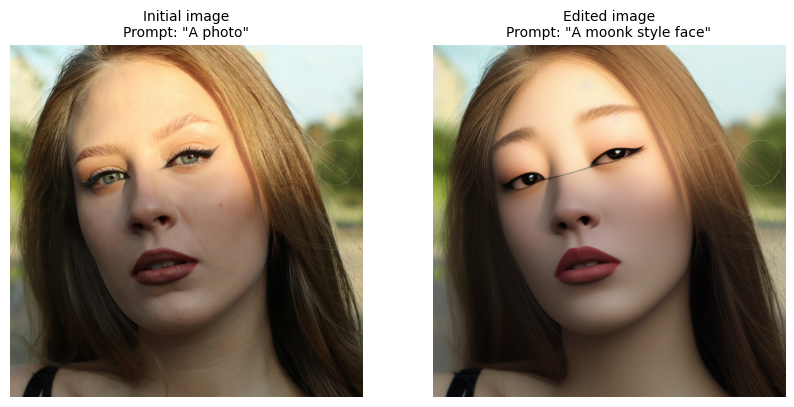

In [10]:
show_images(np.asarray(cnt_img), res, init_prompt, edit_prompt)

In [8]:
config = OmegaConf.load('../configs/ctrl_style.yaml')
guidance = GuidanceEditing(model, config)

In [9]:
res = guidance.call_stylisation(
    image_gt=cnt_img, inv_prompt=init_prompt, trg_prompt=edit_prompt,
    control_image=sty_img, inv_control_prompt=sty_prompt, verbose=True
)

Editing:   0%|          | 0/50 [00:00<?, ?it/s]

[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0 energy
[WARNING]: guider self_attn_map_l2 has 0

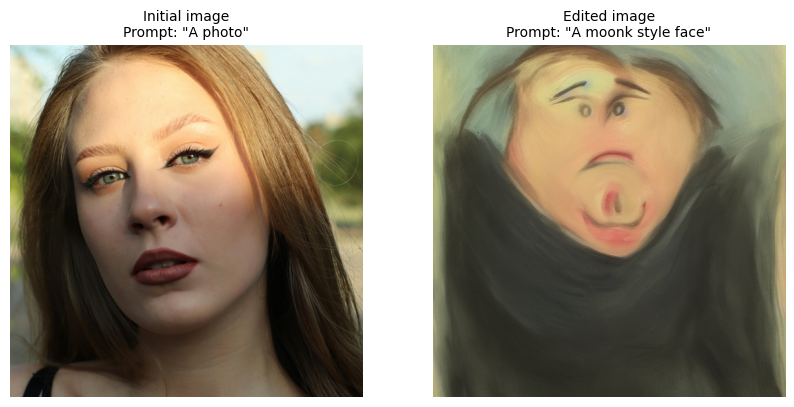

In [10]:
show_images(np.asarray(cnt_img), res, init_prompt, edit_prompt)